Since the previous notebooks already did a great job in data exploration, I would focus on implementing models.

In [1]:
#Load essential packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Preview
df=pd.read_csv('/kaggle/input/starcraft-players-dataset/starcraft_player_data.csv')
df.head(3)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189


In [3]:
#See the shape of the dataset
df.shape

(3395, 20)

In [4]:
#Performing a first check, I noticed some ?'s 
df.drop(df[df['Age']=='?'].index,inplace=True)
df.drop(df[df['TotalHours']=='?'].index,inplace=True)

In [5]:
#Is there any Null values? no
df.isna().sum()

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

In [6]:
#While checking Age column, I noticed the data type is Object,
for col in df.columns:
    print(col,df[col].dtype)

GameID int64
LeagueIndex int64
Age object
HoursPerWeek object
TotalHours object
APM float64
SelectByHotkeys float64
AssignToHotkeys float64
UniqueHotkeys int64
MinimapAttacks float64
MinimapRightClicks float64
NumberOfPACs float64
GapBetweenPACs float64
ActionLatency float64
ActionsInPAC float64
TotalMapExplored int64
WorkersMade float64
UniqueUnitsMade int64
ComplexUnitsMade float64
ComplexAbilitiesUsed float64


In [7]:
#so, convert those into integers.
df = df.astype({"Age": int,"HoursPerWeek": int,"TotalHours":int})

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HoursPerWeek', ylabel='Density'>

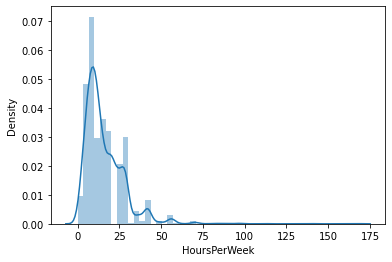

In [8]:
#Perform some initial exploration
sns.distplot(df['HoursPerWeek'])

(array([ 827., 1014.,  798.,  415.,  125.,   82.,   47.,   18.,   10.,
           2.]),
 array([16. , 18.8, 21.6, 24.4, 27.2, 30. , 32.8, 35.6, 38.4, 41.2, 44. ]),
 <BarContainer object of 10 artists>)

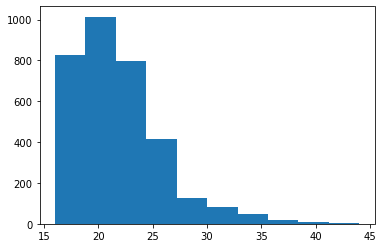

In [9]:
plt.hist(df['Age'],bins=10)

In [10]:
#Split x,y
y=df['LeagueIndex']
df.drop('LeagueIndex',axis=1,inplace=True)
x=df
x.head(3)

,GameID,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189


In [11]:
#While checking Age column, I noticed the data type is Object,
for col in df.columns:
    print(col,df[col].dtype)

GameID int64
Age int64
HoursPerWeek int64
TotalHours int64
APM float64
SelectByHotkeys float64
AssignToHotkeys float64
UniqueHotkeys int64
MinimapAttacks float64
MinimapRightClicks float64
NumberOfPACs float64
GapBetweenPACs float64
ActionLatency float64
ActionsInPAC float64
TotalMapExplored int64
WorkersMade float64
UniqueUnitsMade int64
ComplexUnitsMade float64
ComplexAbilitiesUsed float64


In [12]:
x.drop(['GameID'],axis=1,inplace=True)

In [13]:
x.mean()

Age                      21.650389
HoursPerWeek             15.909527
TotalHours              960.421809
APM                     114.575763
SelectByHotkeys           0.004023
AssignToHotkeys           0.000364
UniqueHotkeys             4.316357
MinimapAttacks            0.000094
MinimapRightClicks        0.000380
NumberOfPACs              0.003433
GapBetweenPACs           40.713819
ActionLatency            64.209584
ActionsInPAC              5.266955
TotalMapExplored         22.116836
WorkersMade               0.001031
UniqueUnitsMade           6.541043
ComplexUnitsMade          0.000060
ComplexAbilitiesUsed      0.000142
dtype: float64

In [14]:
#Since numeric data has different scale, it would be nice to
#Seperate them into two different groups to do outlier analysis
integers=[]
floats=[]
for col in x.columns:
    if x[col].mean()>1:
        integers.append(col)
    else:
        floats.append(col)

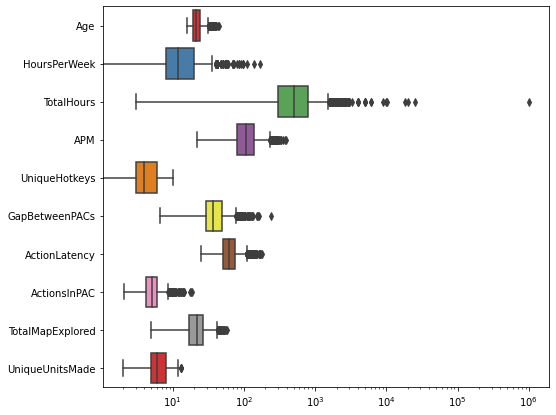

In [15]:
#Integer group
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=x[integers], 
                 orient="h", palette="Set1")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='UniqueUnitsMade', ylabel='Density'>

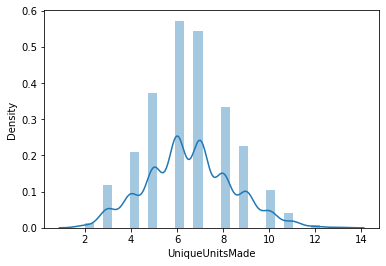

In [16]:
sns.distplot(x['UniqueUnitsMade'])

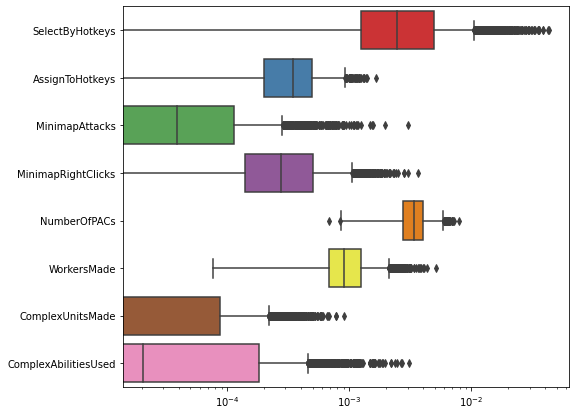

In [17]:
#Float group
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=x[floats], 
                 orient="h", palette="Set1")

In [18]:
y=pd.DataFrame(y)

In [19]:
#Recombine to get rid of outliers
df_red=pd.concat([x,y],axis=1)
df_red.head()

,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,LeagueIndex
0,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000,5
1,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208,5
2,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189,4
3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384,3
4,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019,3


In [20]:
#Drop an outlier
df_red.drop(df_red[df_red['TotalHours']>10**5].index,inplace=True,axis=0)

In [21]:
#Check if it worked
df_red[df_red['TotalHours']>10**4]

,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,LeagueIndex
770,22,16,20000,248.0490,0.023703,0.000391,7,0.000000,0.000205,0.004651,37.8795,45.3760,4.7560,21,0.001526,6,0.000000,0.000000,5
1978,22,10,18000,152.2374,0.011983,0.000206,1,0.000016,0.000364,0.003351,52.1896,63.9811,4.9575,19,0.000680,5,0.000000,0.000000,4
2216,24,20,10260,76.5852,0.000780,0.000197,0,0.000063,0.000316,0.002438,42.9480,84.6340,5.9107,27,0.000450,10,0.000246,0.000358,3
2324,20,8,25000,247.0164,0.015794,0.000438,8,0.000308,0.001339,0.004645,17.6471,37.1837,6.5944,29,0.001860,6,0.000000,0.000012,6


In [22]:
#Re-split x and y
y=df_red['LeagueIndex']
df_red.drop(['LeagueIndex'],inplace=True,axis=1)
X=df_red

In [23]:
# Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Misc
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

In [24]:
# Setup cross validation folds
kf = KFold(n_splits=10, random_state=42, shuffle=True)
# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))
def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [25]:
#Get scores for one model: ridge classifier
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(), RidgeClassifierCV(alphas=ridge_alphas, cv=kf))
cv_rmse(ridge)

array([1.15037094, 1.16972795, 1.15037094, 1.14776534, 1.18750985,
       1.1811899 , 1.16459754, 1.23876331, 1.19433095, 1.15989023])

In [26]:
# XGBoost Classifier
xgboost = XGBClassifier(learning_rate=0.01,
                       n_estimators=1000,
                       gamma=0.6,
                       objective='reg:logistic',
                       seed=27,
                       random_state=42)
# Ridge Classifier
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(), RidgeClassifierCV(alphas=ridge_alphas, cv=kf))

# Support Vector Classifier
svc = make_pipeline(RobustScaler(), SVC(decision_function_shape='ovo'))

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=1000,
                                max_depth=3,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                random_state=42)  

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=1200,
                          max_depth=10,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

In [27]:
#Support Vector Classifier score
scores = {}
score = cv_rmse(svc)
print("SVC: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['svc'] = (score.mean(), score.std())

SVC: 1.0242 (0.0284)


In [28]:
#Ridge classification score
score = cv_rmse(ridge)
print("ridge: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['ridge'] = (score.mean(), score.std())

ridge: 1.1745 (0.0264)


In [29]:
#Random forest score
score = cv_rmse(rf)
print("rf: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['rf'] = (score.mean(), score.std())

rf: 1.0182 (0.0437)


In [30]:
#Gradient boosting classification score
score = cv_rmse(gbc)
print("gbc: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['gbc'] = (score.mean(), score.std())

gbc: 1.0677 (0.0385)


In [31]:
#XGBoost score
score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['xgb'] = (score.mean(), score.std())

xgboost: nan (nan)


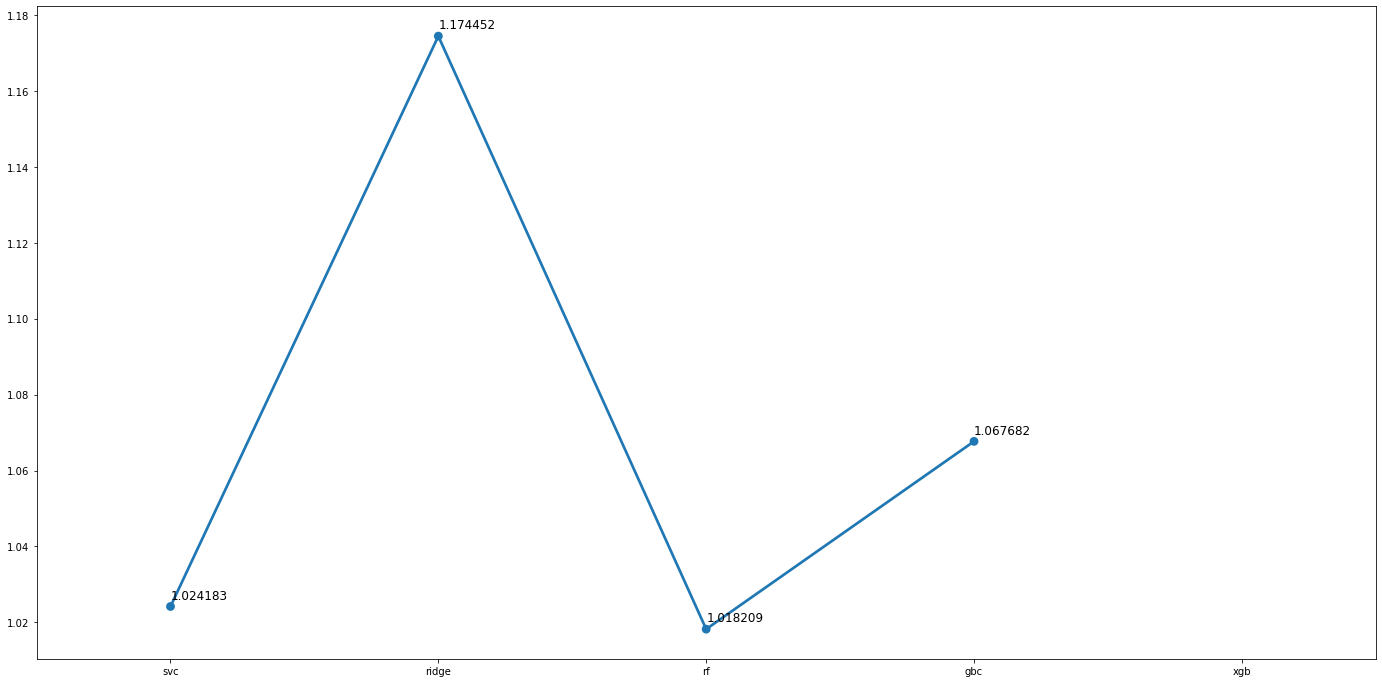

In [32]:
#Scores plot
fig = plt.figure(figsize=(24, 12))
ax = sns.pointplot(x=list(scores.keys()), 
                   y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), size='large')

In [33]:
Y=np.array(y)-1

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_valid,Y_train,Y_valid=train_test_split(X, Y, test_size=0.2, random_state=42)
#To get feature importance, we first need to fit.
xgboost.fit(
    X_train, 
    Y_train, 
    eval_metric="mlogloss", 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
    verbose=True, 
    early_stopping_rounds = 20)

[0]	validation_0-mlogloss:1.93578	validation_1-mlogloss:1.93917
[1]	validation_0-mlogloss:1.92601	validation_1-mlogloss:1.93241
[2]	validation_0-mlogloss:1.91634	validation_1-mlogloss:1.92586
[3]	validation_0-mlogloss:1.90664	validation_1-mlogloss:1.91949
[4]	validation_0-mlogloss:1.89729	validation_1-mlogloss:1.91312
[5]	validation_0-mlogloss:1.88788	validation_1-mlogloss:1.90696
[6]	validation_0-mlogloss:1.87882	validation_1-mlogloss:1.90091
[7]	validation_0-mlogloss:1.86970	validation_1-mlogloss:1.89489
[8]	validation_0-mlogloss:1.86088	validation_1-mlogloss:1.88890
[9]	validation_0-mlogloss:1.85198	validation_1-mlogloss:1.88326
[10]	validation_0-mlogloss:1.84344	validation_1-mlogloss:1.87755
[11]	validation_0-mlogloss:1.83479	validation_1-mlogloss:1.87189
[12]	validation_0-mlogloss:1.82642	validation_1-mlogloss:1.86635
[13]	validation_0-mlogloss:1.81804	validation_1-mlogloss:1.86086
[14]	validation_0-mlogloss:1.80982	validation_1-mlogloss:1.85558
[15]	validation_0-mlogloss:1.80174	

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.6, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

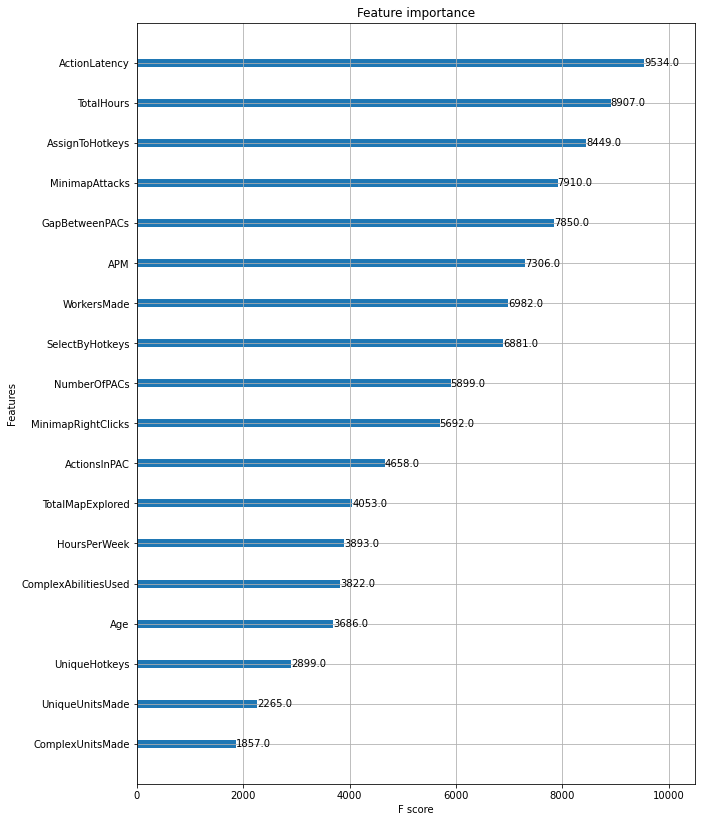

In [35]:
#Feature importance
from xgboost import plot_importance

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

plot_features(xgboost, (10,14))